**Importando as bibliotecas necessárias**

In [2]:
import pickle
from sklearn import tree
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
file = 'SavedBases/encoded.pkl'
with open(file,'rb') as f:
    colunas, x_treino, x_teste, y_treino, y_teste = pickle.load(f)

**Cria a arvore**

In [48]:
arvore = tree.DecisionTreeClassifier(criterion='gini')
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier()

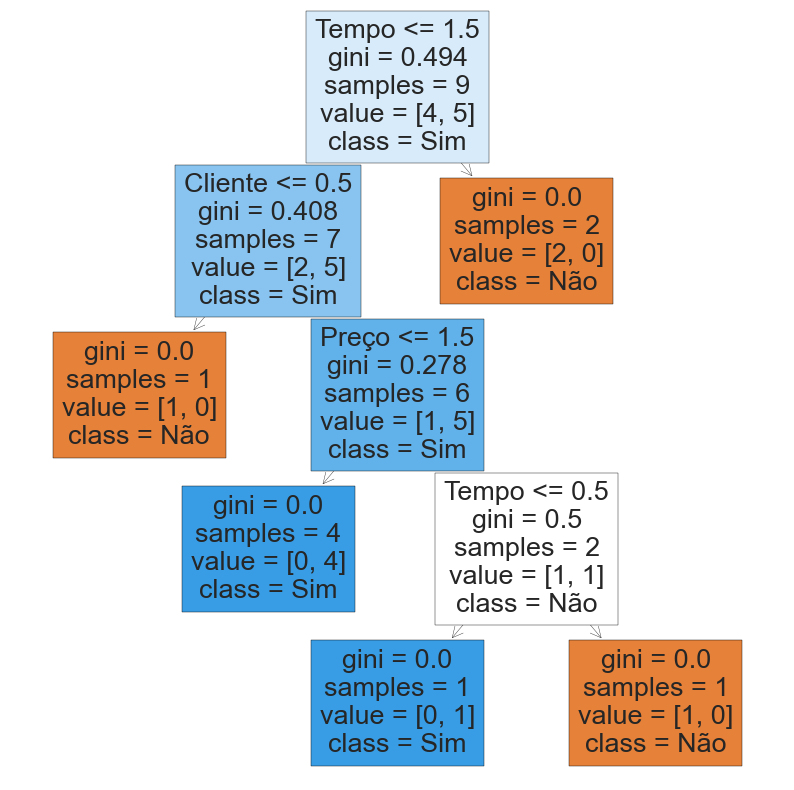

In [54]:
plt.subplots(figsize=(10,10))
tree.plot_tree(arvore, feature_names=colunas, class_names=arvore.classes_, filled=True)
plt.savefig('arvore.png')

**Testando o modelo**

In [55]:
previsoes = arvore.predict(x_teste)

In [56]:
previsoes

array(['Não', 'Não', 'Não'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
accuracy_score(y_teste, previsoes)

0.6666666666666666

0.6666666666666666

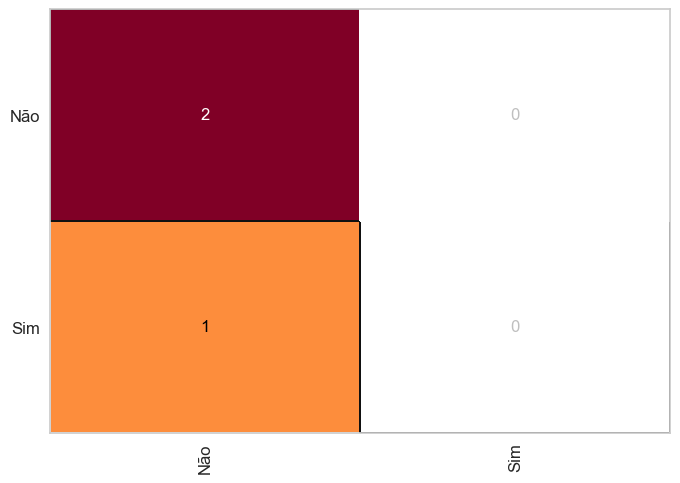

In [58]:
cm = ConfusionMatrix(arvore)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [59]:
print(classification_report(y_teste, previsoes,zero_division=0))

              precision    recall  f1-score   support

         Não       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

